In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.preprocessing import StandardScaler
import pandas as pd
import collections

import seaborn as sns




images = np.load("X_train_reg.npy")
labels = np.load("Y_train_reg.npy")
imagesReshapred = images.reshape([60000,32, 32,1])

**********************Training images**********************


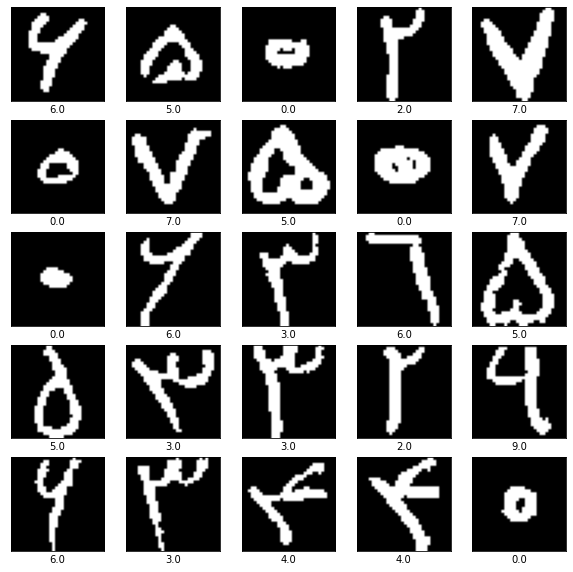

In [5]:
train_dict = {}
flattened_images = []
for i in range(25):
    flattened_images.append(imagesReshapred[i].flatten())
    if i < 50000:
        train_dict[flattened_images[i].tobytes()] = [flattened_images[i], labels[i]]

print("**********************Training images**********************")     
plt.figure(figsize=(10,10))
i = 0
for key, value in train_dict.items():
    if i < 25:
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(value[0].reshape([32,32]), cmap='gray')
        plt.xlabel(value[1])

        i = i + 1
plt.show()

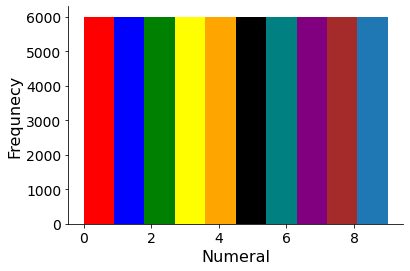

In [8]:
N, bins, patches = plt.hist(labels)

cmap = plt.get_cmap('jet')
low = cmap(0.5)
medium =cmap(0.2)
high = cmap(0.7)


patches[0].set_facecolor('red')
patches[1].set_facecolor('blue')
patches[2].set_facecolor('green')
patches[3].set_facecolor('yellow')
patches[4].set_facecolor('orange')
patches[5].set_facecolor('black')
patches[6].set_facecolor('teal')
patches[7].set_facecolor('purple')
patches[8].set_facecolor('brown')

plt.xlabel("Numeral", fontsize=16)  
plt.ylabel("Frequnecy", fontsize=16)
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)
ax = plt.subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)

plt.show()

Dimensions of Eigen vector: (1024, 2)
Dimensions of Eigen vector: (2, 1024)
vectros: (2, 1024) n std_df: (1024, 60000) n final_df: (2, 60000)


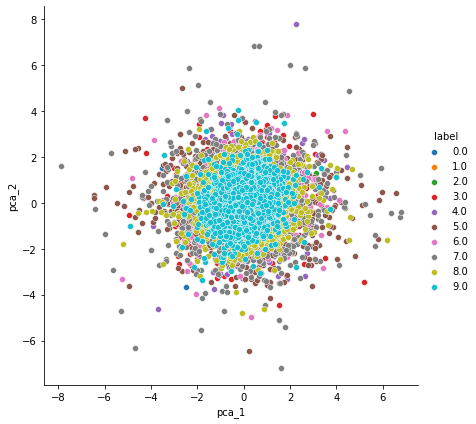

In [7]:
df = images
scaler = StandardScaler()
std_df = scaler.fit_transform(df)
std_df.shape
covar_mat = np.matmul(std_df.T, std_df)
covar_mat.shape
from scipy.linalg import eigh
values, vectors = eigh(covar_mat, eigvals = (782, 783))
print("Dimensions of Eigen vector:", vectors.shape)
vectors = vectors.T
print("Dimensions of Eigen vector:", vectors.shape)
final_df = np.matmul(vectors, std_df.T)
print("vectros:", vectors.shape, "n", "std_df:", std_df.T.shape, "n", "final_df:", final_df.shape)
final_dfT = np.vstack((final_df, labels)).T
dataFrame = pd.DataFrame(final_dfT, columns = ['pca_1', 'pca_2', 'label'])
dataFrame
sns.FacetGrid(dataFrame, hue = 'label', height = 6).map(sns.scatterplot, 'pca_1', 'pca_2').add_legend()
plt.show()